<a href="https://colab.research.google.com/github/mr-nudo/intelligent-tools/blob/master/5_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [4]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values
penguins.dropna(inplace=True)

# Encode the target variable (species)
penguins['species'] = penguins['species'].astype('category').cat.codes

# Separate the features from the target
X = penguins.drop(columns=['species'])
y = penguins['species']

In [5]:
# One-hot encode the categorical features
categorical_features = ['island', 'sex']
categorical_transformer = OneHotEncoder(drop='first')

# Create a ColumnTransformer to apply the OneHotEncoder to the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough'
)

# Standardize the features and apply PCA
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

X_pca = pipeline.fit_transform(X)

# Calculate the explained variance ratio for each principal component
pca = pipeline.named_steps['pca']
explained_variance_ratio = pca.explained_variance_ratio_

# Print the total number of elements in the penguins DataFrame after dropping missing values
print(f"Total number of elements in the cleaned penguins DataFrame: {penguins.size}")

Total number of elements in the cleaned penguins DataFrame: 2331


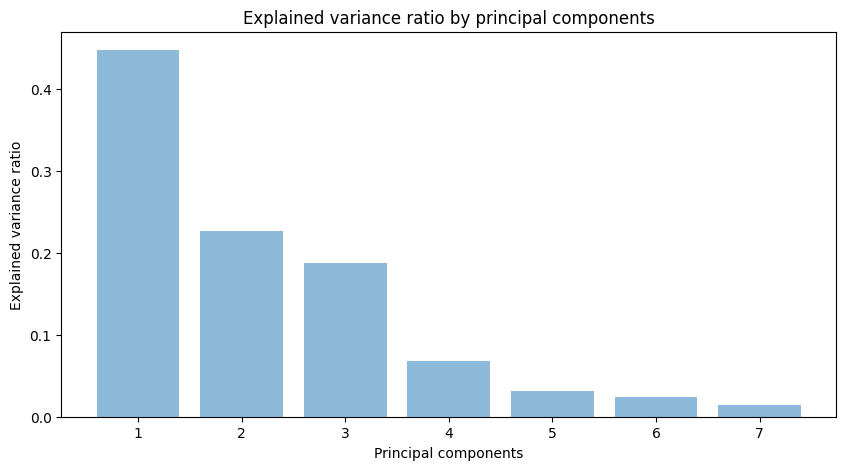

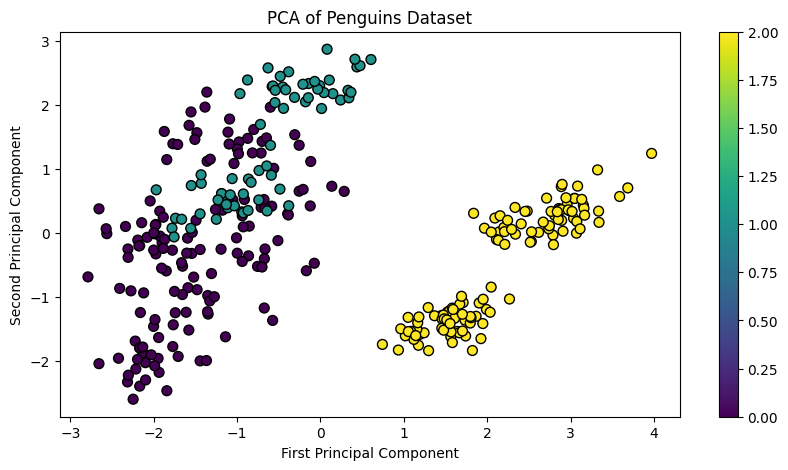

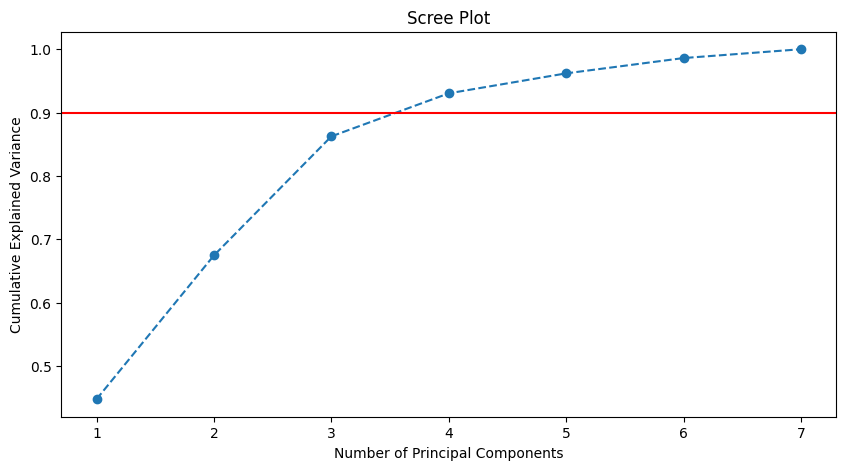

Number of components that explain at least 90% of the variance: 4


In [6]:
# Plot the explained variance ratio using a bar graph
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio by principal components')
plt.show()

# Plot the first two principal components in a scatter plot with colors indicating the target variable
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Penguins Dataset')
plt.colorbar()
plt.show()

# Generate a scree plot to show the cumulative explained variance by the principal components
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

# Determine the number of components that explain at least 90% of the variance
num_components_90_variance = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"Number of components that explain at least 90% of the variance: {num_components_90_variance}")